# Imports and Options

Original parameters for combinedCD version 2:

```
min.cells,3
min.count.rna,500
max.count.rna,60000
min.count.atac,1000
max.count.atac,70000
min.features,200
max.features,2000
max.percent.mt,30
min.percent.mt,0
pct.reads.peaks,20
nucleosome,2
tss.score,1
dims,20
res,0.5
future.mem,62000
future.workers,6
```

In [15]:
%load_ext autoreload
%autoreload 2

import os
import re
import scanpy as scale
import matplotlib
import matplotlib.pyplot as plt
import corescpy as cr
from corescpy import Omics
import warnings
import pandas as pd
import numpy as np

# CHANGE TO YOUR DIRECTORY AND FILE PATH
# ddd = "mnt/cho_lab/disk2/elizabeth/data/combined-cd"
ddd = os.path.join(os.path.expanduser("~"), "projects/data/combined-cd")
file = os.path.join(ddd, "2023-05-12_CombinedCD-v2_new.h5ad")
# file_gca = os.path.join(
#     ddd, "public/gut-cell-atlas/Full_obj_log_counts_soupx_v2.h5ad")

# Options
genes = ["CDKN1A", "CDKN2A", "TP53", "PLAUR", "PTGER4", "FTL", "IL6ST"]
genes_main = ["CDKN1A", "CDKN2A", "TP53", "PLAUR", "PTGER4", "FTL", "IL6ST"]
# genes = list(pd.read_csv(os.path.join(ddd, "panel_senmayo.csv")).gene)
raw = False
col_sample_id = "object"
col_subject = "PubID"
method_cluster = "leiden"
col_cell_type = "ClusterAnnotation"
# col_cell_type = "majority_voting"
col_condition = "Inflammation"
key_control, key_treatment = "Non-inflamed", "Inflamed"
kws_init = dict(col_cell_type=col_cell_type, col_condition=col_condition,
                col_sample_id=col_sample_id, col_subject=col_subject,
                key_control=key_control, key_treatment=key_treatment)
kws_pp = dict(kws_hvg=dict(flavor="cell_ranger", batch_key="object"),
              target_sum=10000.0,
              cell_filter_pmt=[0, 30],
              cell_filter_ngene=[200, 2000],
              cell_filter_ncounts=[500, 60000],
              gene_filter_ncell=[3, None],
              regress_out=None, kws_scale=True)
kws_cluster = dict(method_cluster=method_cluster,
                   kws_umap=None, kws_neighbors=None,  kws_cluster=None,
                   use_highly_variable=True, resolution=0.5, n_comps=20)
if method_cluster == "louvain":
    kws_cluster["kws_cluster"].update({"flavor": "vtraag"})

# Settings
matplotlib.rcParams['figure.figsize'] = (10, 10)
warnings.showwarning = lambda mess, cat, path, lineno, file=None, line=None: \
    print(f"{path}:{lineno}: {cat.__name__}: {mess}", file=file)
warnings.filterwarnings("always", category=UserWarning, module="corescpy")
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Object Initialization

In [3]:
self = Omics(file, **kws_init, raw=raw)
self.adata.raw = None  # causes problems for some reason

# Certain Aesthetic Changes
self.adata = self.adata[self.adata.obs.Region == "Ileum"]
self.adata.obs.replace({"Sex": {"M": "Male"}}, inplace=True)

# Fix Special Characters
self.adata.obs.loc[:, col_condition] = self.adata.obs[col_condition].apply(
    lambda x: re.sub("_", "-", x))  # causes issues with pydeseq2 package
key_treatment, key_control = [re.sub("_", "-", x)
                              for x in [key_treatment, key_control ]]
self._keys.update({"key_treatment": key_treatment,
                   "key_control": key_control})



<<< INITIALIZING OMICS CLASS OBJECT >>>




col_gene_symbols="gene_symbols"
col_cell_type="ClusterAnnotation"
col_sample_id="object"
col_batch="object"
col_subject="PubID"
col_condition="Inflammation"
col_num_umis=None



key_control="Non-inflamed"
key_treatment="Inflamed"


<<< LOADING FILE /home/elizabeth/elizabeth/projects/data/combined-cd/2023-05-12_CombinedCD-v2_new.h5ad with sc.read() >>>
dsfasfda AnnData object with n_obs × n_vars = 215723 × 25817
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'percent.mt', 'object', 'group', 'percent.rb', 'percent.hb', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'ClusterAnnotation', 'Bin', 'PubID', 'PubID_Obj', 'Library', 'AgeAtEnrollment', 'Sex', 'Ancestry', 'TNFAtProcedure', 'DiagnosisYear', 'FistulaCurrent', 'Region', 'Inflammation', 'Race', 'MultiomePair', 'ident'
    uns: 'X_name'
    obsm: 'HARMONY', 'PCA', 'UMAP'
    layers: 'logcounts'


Cell Counts: Initial


Observations: 2

# Processing


Un-Used Keyword Arguments: {'assay_protein': None, 'col_condition': 'Inflammation', 'col_num_umis': None}




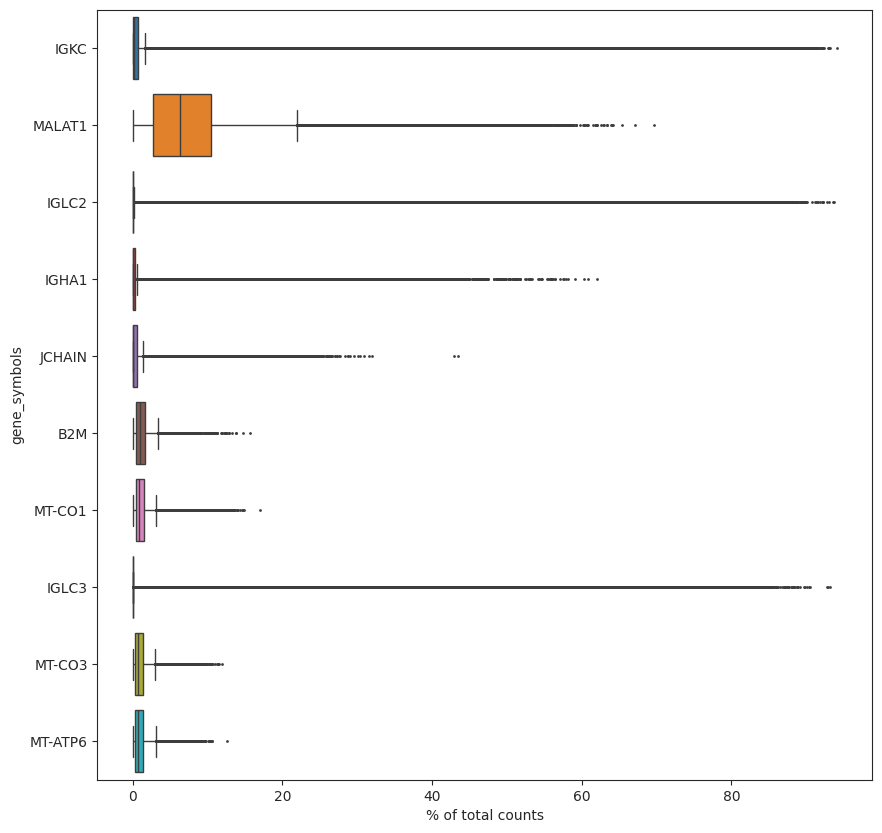

dsfasfda AnnData object with n_obs × n_vars = 215723 × 25817
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'percent.mt', 'object', 'group', 'percent.rb', 'percent.hb', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'ClusterAnnotation', 'Bin', 'PubID', 'PubID_Obj', 'Library', 'AgeAtEnrollment', 'Sex', 'Ancestry', 'TNFAtProcedure', 'DiagnosisYear', 'FistulaCurrent', 'Region', 'Inflammation', 'Race', 'MultiomePair', 'ident', 'n_counts', 'log_counts', 'n_genes'
    uns: 'X_name'
    obsm: 'HARMONY', 'PCA', 'UMAP'
    layers: 'logcounts', 'counts'


Cell Counts: Initial


Observations: 215723

----------------------------------------
LAYER DIMENSIONS:
----------------------------------------
logcounts: (215723, 25817)
counts: (215723, 25817)
----------------------------------------


 ClusterAnnotation
CD4+ T                    48522
IgA1 Plasma               45161
B Cells                   29088
CD8+ T, NK                20054
Fibro

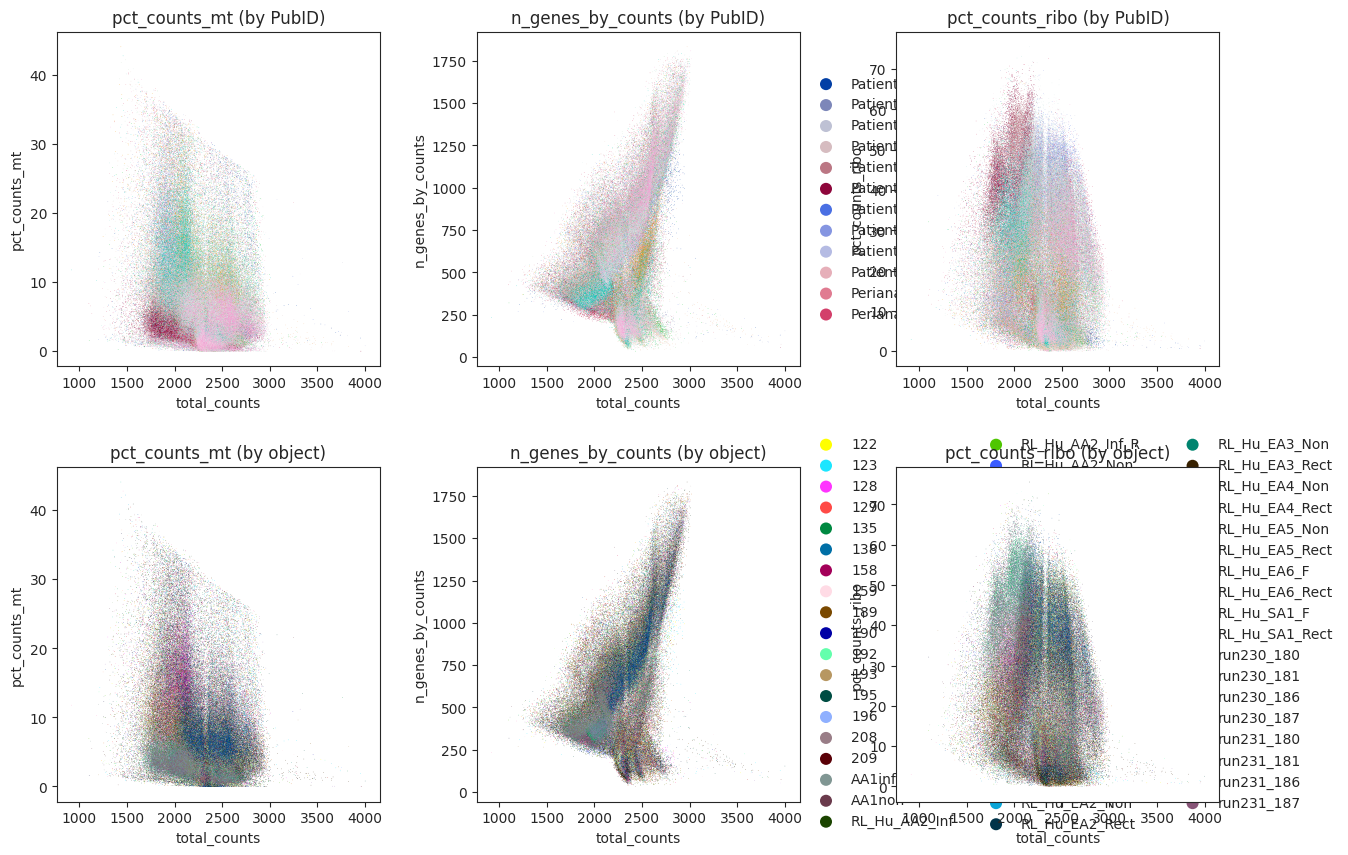

In [24]:
%%time

_ = self.preprocess(**kws_pp)

# Clustering

## UMAP

In [ ]:
%%time

self.cluster(**kws_cluster)
# self.plot_umap(legend_loc="on data")

## Markers

In [ ]:
%%time

marks = self.find_markers(n_genes=3, plot_kws={"kind": "box"})


## Annotation

In [ ]:
%%time

self.annotate_clusters("Cells_Intestinal_Tract.pkl")
marks = self.find_markers(col_cell_type="majority_voting", n_genes=3)


# Plots

## Options

Choose available genes of interest, etc.

In [ ]:
goi = list(set(genes_main).intersection(self.rna.var_names))


## General GEX

In [ ]:
_ = self.plot(goi, kws_umap=dict(cmap="magma", vcenter=None, vmax=10),
              kws_heat=dict(vcenter=0, cmap="coolwarm"),
              kws_matrix=dict(vcenter=0, cmap="coolwarm"))


## Coexpression

In [ ]:
self.plot_coex([goi[0], goi[1]])


## GEX by Inflammation (and TNF)

### Single Gene

In [ ]:
# fig = self.plot_compare(genes=goi, kind="violin", palette=["r", "gray"])
_ = self.plot_compare(genes=goi, kind="box", palette=["r", "gray"])
_ = self.plot_compare(genes=goi, kind="box", palette=["r", "gray"],
                      columns="TNFAtProcedure", long_labels=True)


### Multi-Gene, Multi-Color

In [ ]:
# default_fs = plt.rcParams["figure.figsize"]
# plt.rcParams["figure.figsize"] = (60, 60)
# ggg = list(set(genes).intersection(set(self.rna.var_names)))
# for g in [list(x) for x in np.array_split(ggg, 24)]:
#     _ = self.plot_umap(g, group=self._columns["col_condition"],
#                        figsize=(20, 20), frameon=False)


# Analysis  

To save the preprocessed object:

```
import re
self.adata.write_h5ade.sub("_new.h5ad", "_processed.h5ad", file))
```

## Ligand-Receptor with DEA

Ligand-receptor analysis with overlaid differential expression analysis on pseudo-bulk data

In [ ]:
%%time

key_targets = None
key_sources = ["Epithelial", "Endothelial, Lymphatic",
               "Fibroblasts", "Myofibroblasts", "Myeloid", "ILC3"]
# kws_deseq2 = dict(min_mu=0.5, min_disp=1e-08, max_disp=10, min_replicates=3)
kws_deseq2 = dict(figsize=(45, 30))
out_lr = self.calculate_receptor_ligand(
    col_condition=True, figsize=(25, 15), p_threshold=0.01,
    min_prop=0, min_count=0, min_total_count=0, kws_deseq2=kws_deseq2,
    key_targets=key_targets, key_sources=key_sources, n_jobs=4)


In [ ]:
# You can make new plots (e.., different targets/source, figure size, etc.)
# without re-running all the analyses. You can also save figures this way.
# key_sources = ["Epithelial", "Endothelial, Lymphatic", "Myeloid"]
# self.plot_receptor_ligand(key_sources=key_sources, key_targets=key_sources,
#                           out_dir="plots_ilealCD", figsize=(30, 15),
#                           figsize_dea=(45, 30), dpi=100)

# Save Figures
# for c in self.figures["receptor_ligand"]:
#     if isinstance(self.figures["receptor_ligand"][c], dict):
#         for q in self.figures["receptor_ligand"][c]:
#             self.figures["receptor_ligand"][c][q].save(
#                 f"plots_ilealCD/{c}_{q}.png", limitsize=False)
#     else:
#         self.figures["receptor_ligand"][c].save(
#             f"plots_ilealCD/{c}.png", limitsize=False)


## Causal Network

In [ ]:
%%time

key_source, key_target = "Epithelial", "Myeloid"
out = self.calculate_causal_network(key_source, key_target)


## Functional Analysis (Pseudo-Bulk)

In [ ]:
# out_fx = self.run_fx_analysis([self._columns["col_condition"]])


## Gene Set Enrichment Analysis

### By Cell Type & Inflammation

This way will choose the pathways shown in the plot using the scores and p-values.

In [ ]:
%%time

out_gsea = self.run_gsea(key_condition="Epithelial_Inflamed")


### Plot Specified Pathways

This list could have been supplied to the `ifn_pathways` argument in the `self.run_gsea()` call above to get these plots with the original run.

This function allows you to plot different pathways and/or use different arguments for plotting (e.g., for aesthetics) without re-running the analysis.

In [ ]:
ifn_pathways = [
    "REACTOME_DNA_DOUBLE_STRAND_BREAK_REPAIR",
    "REACTOME_NUCLEOTIDE_EXCISION_REPAIR",
    "REACTOME_CELLULAR_RESPONSE_TO_STARVATION",
    "REACTOME_TIGHT_JUNCTION_INTERACTIONS",
    "REACTOME_CELL_CELL_JUNCTION_ORGANIZATION",
    "REACTOME_PLASMA_LIPOPROTEIN_REMODELING",
    str("REACTOME_IMMUNOREGULATORY_INTERACTIONS_BETWEEN_A_LYMPHOID_AND_"
        "A_NON_LYMPHOID_CELL"),
    "REACTOME_SIGNALING_BY_PDGFR_IN_DISEASE",
    "REACTOME_SWITCHING_OF_ORIGINS_TO_A_POST_REPLICATIVE_STATE"]
self.plot_gsea(ifn_pathways=ifn_pathways, cmap="magma")


### Across Cell Types

In [ ]:
out_gsea_i = self.run_gsea(col_condition=self._columns["col_condition"],
                           key_condition=self._keys["key_treatment"],
                           ifn_pathways=True)  # auto-choose pathways to plot


## Composition Analysis

In [ ]:
out_comp = self.run_composition_analysis(covariates=["TNFAtProcedure"])


# Workspace

In [ ]:
# # lig_rec = "COPA-CD74"
# # lig_rec = "MYL9-CD69"
# # lig_rec = "HMGB1-CXCR4"
# # lig_rec = "CXCL14-CXCR4"
# # lig_rec = "MFGE8-PDGFRB"
# # lig_rec = "CALM1-MYLK"
# # lig_rec = "CALM2-MYLK"
# # lig_rec = "CALM3-MYLK"
# lig_rec = "HMGB1-CXCR4"
# p_threshold = 0.001

# out_lr = self.results["receptor_ligand"]
# ligand, receptor = lig_rec.split("-")
# for s in out_lr[list(out_lr.keys())[0]].source.unique():
#     print(f"Source = {s}\n\n")
#     for c in out_lr:
#         dff = out_lr[c][out_lr[c].cellphone_pvals < p_threshold]
#         targs = list(dff[(dff["source"] == s) & (
#             dff["ligand"] == ligand) & (
#                 dff["receptor_complex"] == receptor)]["target"])
#         print(f"{c}\n{'-' * len(c)}\n{targs}")
#     print("\n\n", "=" * 80, "\n\n\n")


In [ ]:
# res = self.results["receptor_ligand"]["liana_res"]
# targs = res[(res.cellphone_pvals < p_threshold) & (res.lr_means > 1)
#             ].groupby(["receptor", "ligand", "source", res.index.names[0]]
#                       ).apply(lambda x: list(x.target))
# print(targs.head())
# ktc = self._keys["key_treatment"], self._keys["key_control"]
# for i in [[0, 1], [1, 0]]:  # loop (1)  tx v. control, (2) vice-versa
#     print("=" * 80, ["Tx v. C", "C vs. Tx"][i], "=" * 80, "\n\n")
#     print(targs.loc[receptor, ligand, :].reset_index(0).groupby(
#         "source").apply(lambda x: list(set(x.loc[ktc[i[0]], 0]).difference(
#             set(x.loc[ktc[i[1]], 0])))))  # difference in significant sources


In [ ]:
# targs.reset_index()[targs.reset_index().receptor == "MYLK"
#                     ].reset_index().ligand.unique()


In [ ]:
# rrr = res[(res.ligand == ligand) & (res.receptor == receptor) & (
#     res.cellphone_pvals < 1e-3) & (res.lr_means > 1)]
# rrr


In [ ]:
# tmp = [out_lr[c][out_lr[c].cellphone_pvals < 0.01].target for c in ktc]
# targs = []
# for s in out_lr[list(out_lr.keys())[0]].source.unique():
#     print(s)
#     for t in tmp:
#         targs += [list(dff[(dff["source"] == s) & (dff["ligand"] == ligand) & (
#             dff["receptor_complex"] == receptor)]["target"])]
#     print(s + ": " + ", ".join(set(targs[0]).difference(targs[1])))
